In [ ]:
!pip install tensorflow==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 421.8 MB 26 kB/s 
     |████████████████████████████████| 50 kB 7.7 MB/s 
     |████████████████████████████████| 3.8 MB 63.4 MB/s 
     |████████████████████████████████| 26.1 MB 1.4 MB/s 
     |████████████████████████████████| 448 kB 67.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=aa6ac198b1c9062177e859f8f00c4b56682a3662973d9298cacdb7b61dbf6f6c
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      

In [ ]:
!pip install keras==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 18.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
!pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 32.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [1]:
import tensorflow as tf
print('版本:',tf.__version__)
import keras
print('版本:',keras.__version__)

版本: 2.1.0
版本: 2.3.1


Using TensorFlow backend.


In [2]:
import h5py
print('版本:',h5py.__version__)

版本: 2.10.0


In [3]:
import numpy as np
import cv2,glob
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_real = np.load('/content/x_real_fp.npz')['data']
y_real = np.load('/content/y_real_fp.npy')
x_easy = np.load('/content/x_easy_fp.npz')['data']
y_easy = np.load('/content/y_easy_fp.npy')
x_medium = np.load('/content/x_medium_fp.npz')['data']
y_medium = np.load('/content/y_medium_fp.npy')
x_hard = np.load('/content/x_hard_fp.npz')['data']
y_hard = np.load('/content/y_hard_fp.npy')

In [27]:
print(x_real.shape,y_real.shape)
print(x_easy.shape,y_easy.shape)
print(x_medium.shape,y_medium.shape)
print(x_hard.shape,y_hard.shape)

(6000, 96, 96, 3) (6000, 4)
(17931, 96, 96, 3) (17931, 4)
(17067, 96, 96, 3) (17067, 4)
(14272, 96, 96, 3) (14272, 4)


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_all_data = np.concatenate([x_easy, x_medium, x_hard], axis=0)
label_all_data = np.concatenate([y_easy, y_medium, y_hard], axis=0)
print(x_all_data.shape, label_all_data.shape)
permutation = list(np.random.permutation(x_all_data.shape[0])) # permutation 隨機排
x_data = x_all_data[permutation][:6000]
label_data = label_all_data[permutation][:6000]
x_train, x_val, label_train, label_val = train_test_split(x_data, label_data, test_size=0.2)
print(x_data.shape, label_data.shape) 
print(x_train.shape, label_train.shape) # 訓練
print(x_val.shape, label_val.shape) # 驗證

(49270, 96, 96, 3) (49270, 4)
(6000, 96, 96, 3) (6000, 4)
(4800, 96, 96, 3) (4800, 4)
(1200, 96, 96, 3) (1200, 4)


In [7]:
permutation = list(np.random.permutation(x_real.shape[0])) # permutation 隨機排列
x_test = x_real[permutation][:1200]
label_test = y_real[permutation][:1200]
print(x_test.shape, label_test.shape) # 測試

(1200, 96, 96, 3) (1200, 4)


In [8]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from PIL import Image

In [11]:
rs_model = ResNet50(include_top=False, weights="imagenet",input_shape=(120,120,3))

In [12]:
#train data

print('調整X_train的圖片尺寸...')
x_train_new = np.array([np.asarray(Image.fromarray(x_train[i]).resize((120, 120))) 
                        for i in range(0, len(x_train))])
x_train_new = x_train_new.astype('float32')

print(x_train_new.shape)


調整X_train的圖片尺寸...
(4800, 120, 120, 3)


In [13]:
#訓練資料前處理
train_input=preprocess_input(x_train_new)
print('使用 RasNet50 模型預測訓練資料的特徵資料...')
train_features = rs_model.predict(train_input,verbose=1)

使用 RasNet50 模型預測訓練資料的特徵資料...
4800/4800 [==============================] - 11s 2ms/sample


In [14]:
print(train_features.shape)

(4800, 4, 4, 2048)


In [16]:
#val_data

print('調整X_val的圖片尺寸...')
x_val_new = np.array([np.asarray(Image.fromarray(x_val[i]).resize((120, 120))) 
for i in range(0, len(x_val))])
x_val_new = x_val_new.astype('float32')
print(x_val_new.shape)


調整X_val的圖片尺寸...
(1200, 120, 120, 3)


In [17]:
#驗證資料前處理

val_input=preprocess_input(x_val_new)
print('使用 RasNet50 模型預測驗證資料的特徵資料...')
val_features = rs_model.predict(val_input,verbose=1)

使用 RasNet50 模型預測驗證資料的特徵資料...
1200/1200 [==============================] - 2s 2ms/sample


In [18]:
print(val_features.shape)

(1200, 4, 4, 2048)


In [19]:
#test data

print('調整x_test的圖片尺寸...')
x_test_new = np.array([np.asarray(Image.fromarray(x_test[i]).resize((120, 120))) 
for i in range(0, len(x_test))])
x_test_new = x_test_new.astype('float32')
print(x_test_new.shape)


調整x_test的圖片尺寸...
(1200, 120, 120, 3)


In [20]:
#測測試資料前處理

test_input=preprocess_input(x_test_new)
print('使用 RasNet50 模型預測測試資料的特徵資料...')
test_features = rs_model.predict(test_input,verbose=1)

使用 RasNet50 模型預測測試資料的特徵資料...
1200/1200 [==============================] - 2s 1ms/sample


In [21]:
print(test_features.shape)

(1200, 4, 4, 2048)


In [24]:
#標籤正規化

print('訓練資料:')
id_label_train = to_categorical(label_train[:,0]-1)
print('身分',id_label_train.shape)
gender_label_train = to_categorical(label_train[:,1])
print('性別',gender_label_train.shape)
LRhand_label_train = to_categorical(label_train[:,2])
print('左右手',LRhand_label_train.shape)
finger_label_train = to_categorical(label_train[:,3])
print('指頭',finger_label_train.shape)

print('驗證 :')
id_label_val = to_categorical(label_val[:,0]-1)
print('身分',id_label_val.shape)
gender_label_val = to_categorical(label_val[:,1])
print('性別',gender_label_val.shape)
LRhand_label_val = to_categorical(label_val[:,2])
print('左右手',LRhand_label_val.shape)
finger_label_val = to_categorical(label_val[:,3])
print('指頭',finger_label_val.shape)

print('測試資料:')
id_label_test = to_categorical(label_test[:,0]-1)
print('身分',id_label_test.shape)
gender_label_test = to_categorical(label_test[:,1])
print('性別',gender_label_test.shape)
LRhand_label_test = to_categorical(label_test[:,2])
print('左右手',LRhand_label_test.shape)
finger_label_test = to_categorical(label_test[:,3])
print('指頭',finger_label_test.shape)


訓練資料:
身分 (4800, 600)
性別 (4800, 2)
左右手 (4800, 2)
指頭 (4800, 5)
驗證 :
身分 (1200, 600)
性別 (1200, 2)
左右手 (1200, 2)
指頭 (1200, 5)
測試資料:
身分 (1200, 600)
性別 (1200, 2)
左右手 (1200, 2)
指頭 (1200, 5)


In [25]:
#id model

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model.add(Dropout(0.5))
model.add(Dense(600, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history = model.fit(train_features,id_label_train, validation_data=(val_features, id_label_val),
                    epochs=100, batch_size=32, verbose=2)

print("\nTesting...")
loss, accuracy = model.evaluate(test_features,id_label_test,verbose=1)
print("測試資料集準確度 = {:.2f}".format(accuracy))


Train on 4800 samples, validate on 1200 samples
Epoch 1/100
4800/4800 - 1s - loss: 8.8391 - accuracy: 0.0098 - val_loss: 6.4343 - val_accuracy: 0.0408
Epoch 2/100
4800/4800 - 1s - loss: 5.8536 - accuracy: 0.0833 - val_loss: 6.3054 - val_accuracy: 0.0708
Epoch 3/100
4800/4800 - 1s - loss: 4.4287 - accuracy: 0.1854 - val_loss: 6.1653 - val_accuracy: 0.0833
Epoch 4/100
4800/4800 - 1s - loss: 3.4788 - accuracy: 0.2777 - val_loss: 6.1693 - val_accuracy: 0.1100
Epoch 5/100
4800/4800 - 1s - loss: 2.7353 - accuracy: 0.3977 - val_loss: 6.0404 - val_accuracy: 0.1333
Epoch 6/100
4800/4800 - 1s - loss: 2.1930 - accuracy: 0.4854 - val_loss: 6.2298 - val_accuracy: 0.1367
Epoch 7/100
4800/4800 - 1s - loss: 1.7668 - accuracy: 0.5602 - val_loss: 6.0198 - val_accuracy: 0.1700
Epoch 8/100
4800/4800 - 1s - loss: 1.4537 - accuracy: 0.6360 - val_loss: 6.1444 - val_accuracy: 0.1675
Epoch 9/100
4800/4800 - 1s - loss: 1.2574 - accuracy: 0.6773 - val_loss: 6.1214 - val_accuracy: 0.1758
Epoch 10/100
4800/4800 - 

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 600)               1229400   
Total params: 1,229,400
Trainable params: 1,229,400
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.save('/content/resnet50_fpAll_id.h5')

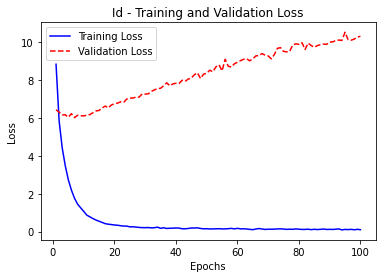

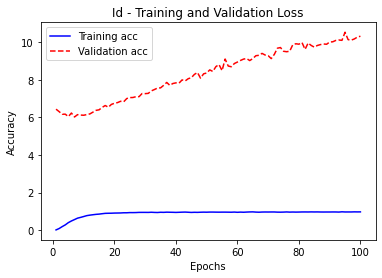

In [28]:
# 顯示訓練和測試損失
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Id - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_loss, 'r--', label='Validation acc')
plt.title('Id - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
#gender model
model_g = Sequential()
model_g.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model_g.add(Dropout(0.5))
model_g.add(Dense(2, activation='softmax'))

model_g.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

history_g = model_g.fit(train_features,gender_label_train, validation_data=(val_features, gender_label_val),
                    epochs=100, batch_size=32, verbose=2)
print("\nTesting...")
loss, accuracy = model_g.evaluate(test_features,gender_label_test,verbose=1)
print("測試資料集準確度 = {:.2f}".format(accuracy))

Train on 4800 samples, validate on 1200 samples
Epoch 1/100
4800/4800 - 1s - loss: 0.8238 - accuracy: 0.7165 - val_loss: 0.5175 - val_accuracy: 0.8175
Epoch 2/100
4800/4800 - 1s - loss: 0.5957 - accuracy: 0.7519 - val_loss: 0.4525 - val_accuracy: 0.8258
Epoch 3/100
4800/4800 - 1s - loss: 0.5448 - accuracy: 0.7731 - val_loss: 0.4293 - val_accuracy: 0.8192
Epoch 4/100
4800/4800 - 1s - loss: 0.5048 - accuracy: 0.7842 - val_loss: 0.4399 - val_accuracy: 0.8108
Epoch 5/100
4800/4800 - 1s - loss: 0.4976 - accuracy: 0.7887 - val_loss: 0.4450 - val_accuracy: 0.8225
Epoch 6/100
4800/4800 - 1s - loss: 0.4801 - accuracy: 0.7948 - val_loss: 0.4243 - val_accuracy: 0.8283
Epoch 7/100
4800/4800 - 1s - loss: 0.4887 - accuracy: 0.7883 - val_loss: 0.5193 - val_accuracy: 0.8200
Epoch 8/100
4800/4800 - 1s - loss: 0.5006 - accuracy: 0.7844 - val_loss: 0.4121 - val_accuracy: 0.8283
Epoch 9/100
4800/4800 - 1s - loss: 0.4856 - accuracy: 0.7896 - val_loss: 0.4427 - val_accuracy: 0.8258
Epoch 10/100
4800/4800 - 

In [30]:
model_g.save('/content/resnet50_fpAll_gneder.h5')

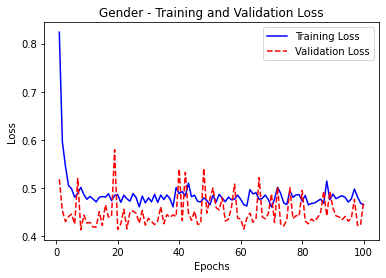

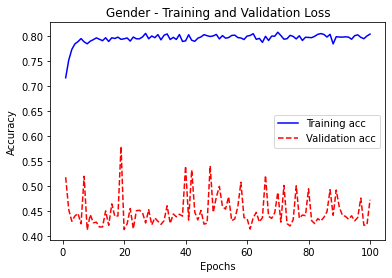

In [31]:
# 顯示訓練和測試損失
loss = history_g.history['loss']
epochs = range(1, len(loss) + 1)
val_loss = history_g.history['val_loss']
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Gender - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history_g.history['accuracy']
epochs = range(1, len(acc) + 1)
val_acc = history_g.history['val_accuracy']
plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_loss, 'r--', label='Validation acc')
plt.title('Gender - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
#LRhand model
model_LR = Sequential()
model_LR.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model_LR.add(Dropout(0.5))
model_LR.add(Dense(2, activation='softmax'))

model_LR.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

history_LR = model_LR.fit(train_features,LRhand_label_train, validation_data=(val_features, LRhand_label_val),
                    epochs=100, batch_size=32, verbose=2)
print("\nTesting...")
loss, accuracy = model_LR.evaluate(test_features,LRhand_label_test,verbose=1)
print("測試資料集準確度 = {:.2f}".format(accuracy))

Train on 4800 samples, validate on 1200 samples
Epoch 1/100
4800/4800 - 1s - loss: 1.0150 - accuracy: 0.5756 - val_loss: 0.5674 - val_accuracy: 0.7058
Epoch 2/100
4800/4800 - 1s - loss: 0.7210 - accuracy: 0.6400 - val_loss: 0.6117 - val_accuracy: 0.6642
Epoch 3/100
4800/4800 - 1s - loss: 0.6357 - accuracy: 0.6792 - val_loss: 0.5773 - val_accuracy: 0.7025
Epoch 4/100
4800/4800 - 1s - loss: 0.6059 - accuracy: 0.6954 - val_loss: 0.5221 - val_accuracy: 0.7375
Epoch 5/100
4800/4800 - 1s - loss: 0.6139 - accuracy: 0.6894 - val_loss: 0.5132 - val_accuracy: 0.7492
Epoch 6/100
4800/4800 - 1s - loss: 0.5995 - accuracy: 0.7073 - val_loss: 0.5196 - val_accuracy: 0.7400
Epoch 7/100
4800/4800 - 1s - loss: 0.5991 - accuracy: 0.6998 - val_loss: 0.5133 - val_accuracy: 0.7517
Epoch 8/100
4800/4800 - 1s - loss: 0.5936 - accuracy: 0.7085 - val_loss: 0.5139 - val_accuracy: 0.7383
Epoch 9/100
4800/4800 - 1s - loss: 0.6042 - accuracy: 0.7081 - val_loss: 0.5003 - val_accuracy: 0.7525
Epoch 10/100
4800/4800 - 

In [33]:
model_LR.save('/content/resnet50_fpAll_LR.h5')

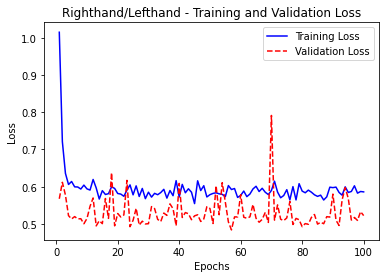

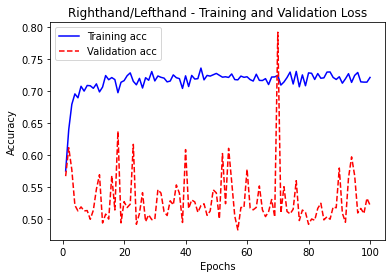

In [34]:
# 顯示訓練和測試損失
loss = history_LR.history['loss']
epochs = range(1, len(loss) + 1)
val_loss = history_LR.history['val_loss']
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Righthand/Lefthand - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history_LR.history['accuracy']
epochs = range(1, len(acc) + 1)
val_acc = history_LR.history['val_accuracy']
plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_loss, 'r--', label='Validation acc')
plt.title('Righthand/Lefthand - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
#finger model
model_f = Sequential()
model_f.add(GlobalAveragePooling2D(input_shape=train_features.shape[1:]))
model_f.add(Dropout(0.5))
model_f.add(Dense(5, activation='softmax'))

model_f.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history_f = model_f.fit(train_features,finger_label_train, validation_data=(val_features, finger_label_val),
                    epochs=100, batch_size=32, verbose=2)
print("\nTesting...")
loss, accuracy = model_f.evaluate(test_features,finger_label_test,verbose=1)
print("測試資料集準確度 = {:.2f}".format(accuracy))


Train on 4800 samples, validate on 1200 samples
Epoch 1/100
4800/4800 - 1s - loss: 2.0078 - accuracy: 0.3683 - val_loss: 1.1880 - val_accuracy: 0.5075
Epoch 2/100
4800/4800 - 1s - loss: 1.4305 - accuracy: 0.4798 - val_loss: 1.1260 - val_accuracy: 0.5442
Epoch 3/100
4800/4800 - 1s - loss: 1.3003 - accuracy: 0.4850 - val_loss: 1.0655 - val_accuracy: 0.5617
Epoch 4/100
4800/4800 - 1s - loss: 1.2034 - accuracy: 0.5190 - val_loss: 1.1076 - val_accuracy: 0.5358
Epoch 5/100
4800/4800 - 1s - loss: 1.1719 - accuracy: 0.5367 - val_loss: 1.1479 - val_accuracy: 0.5408
Epoch 6/100
4800/4800 - 1s - loss: 1.1351 - accuracy: 0.5429 - val_loss: 1.0871 - val_accuracy: 0.5650
Epoch 7/100
4800/4800 - 1s - loss: 1.1129 - accuracy: 0.5608 - val_loss: 1.1107 - val_accuracy: 0.5675
Epoch 8/100
4800/4800 - 1s - loss: 1.0962 - accuracy: 0.5612 - val_loss: 1.0845 - val_accuracy: 0.5425
Epoch 9/100
4800/4800 - 1s - loss: 1.0663 - accuracy: 0.5740 - val_loss: 1.0426 - val_accuracy: 0.5892
Epoch 10/100
4800/4800 - 

In [36]:
model_f.save('/content/resnet50_fpAll_finger.h5')

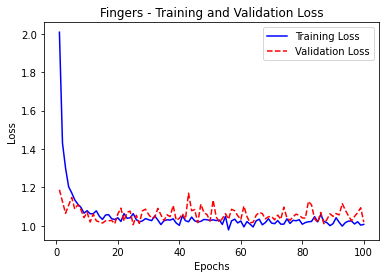

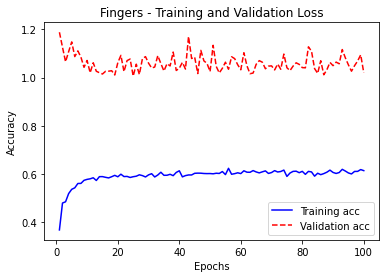

In [37]:
# 顯示訓練和測試損失
loss = history_f.history['loss']
epochs = range(1, len(loss) + 1)
val_loss = history_f.history['val_loss']
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Fingers - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history_f.history['accuracy']
epochs = range(1, len(acc) + 1)
val_acc = history_f.history['val_accuracy']
plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_loss, 'r--', label='Validation acc')
plt.title('Fingers - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()